# 📦 Setting up the Toolkit

In [31]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re
from bs4 import BeautifulSoup
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import difflib

from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

# 📊 Exploring the Data

In [32]:
train_df = pd.read_csv('../input/nlp-getting-started/train.csv')
test_df = pd.read_csv('../input/nlp-getting-started/test.csv')
sample_submission = pd.read_csv("../input/nlp-getting-started/sample_submission.csv")

In [33]:
# train_df.iloc[136:146]
train_df.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [34]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [35]:
sample_submission.head(2)

,id,target
0,0,0
1,2,0


# 🧹 Tidying Text Data

In [36]:
def convert_to_lower(text):
    return text.lower()

In [37]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def woking_in_lemmatize(text):
    # Tokenize the input text into words
    words = word_tokenize(text)
    # Lemmatize the words and remove URLs
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in words if not word.startswith('http')]
    # Join the lemmatized words back into a string
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

In [38]:
def remove_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'
    processed_text = re.sub(url_pattern, '', text)
    return processed_text

In [39]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    clean_text = soup.get_text()
    return clean_text

In [40]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & map symbols
        u"\U0001F700-\U0001F77F"  # Alphabetic presentation forms
        u"\U0001F780-\U0001F7FF"  # Geometric shapes
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental symbols and pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and pictographs for Zodiac signs
        u"\U0001F700-\U0001F77F"  # Glag symbols
        u"\U0001F780-\U0001F7FF"  # Weather symbols
        u"\U0001F880-\U0001F8FF"  # Supplemental arrows-A
        u"\U0001F300-\U0001F5FF"  # Miscellaneous symbols
        u"\U0001F680-\U0001F6FF"  # Transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "]+",
        flags=re.UNICODE,
    )
    clean_text = emoji_pattern.sub(r"", text)
    return clean_text

In [41]:
def remove_multiple_spaces(text):
    # Regular expression pattern to match multiple spaces
    space_pattern = r'\s+'
    # Replace multiple spaces with a single space
    clean_text = re.sub(space_pattern, ' ', text)
    return clean_text.strip()  # Remove leading and trailing spaces

In [42]:
def remove_timestamps(text):
    # Regular expression pattern to match timestamps like [01:04 UTC]
    timestamp_pattern = r'\[\d{2}:\d{2} [A-Za-z]{3}\]'
    # Remove timestamps from the text
    clean_text = re.sub(timestamp_pattern, '', text)
    return clean_text.strip()  # Remove leading and trailing spaces

In [43]:
def remove_punctuations_and_timestamps(text):
    # Remove punctuations
    text_without_punctuations = text.translate(str.maketrans('', '', string.punctuation))
    
    # Regular expression pattern to match timestamps like [01:04 UTC]
    timestamp_pattern = r'\[\d{2}:\d{2} [A-Za-z]{3}\]'
    # Remove timestamps from the text
    text_without_timestamps = re.sub(timestamp_pattern, '', text_without_punctuations)
    
    return text_without_timestamps.strip()  # Remove leading and trailing spaces

In [44]:
def remove_special_characters(text):
    # Remove non-alphanumeric characters and whitespace
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return clean_text

In [45]:
def remove_english_words(text):
    # Tokenize the input text into words
    words = word_tokenize(text)
    
    # Get the list of English stop words
    stop_words = set(stopwords.words('english'))
    
    stop_updated = stop_words
    # Remove common words from the text
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the filtered words back into a string
    clean_text = ' '.join(filtered_words)
    return clean_text

In [46]:
replacements = {
    "they'd": "they would",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not",
    "don't": "do not",
    "doesn't": "does not",
    "didn't": "did not",
    "can't": "cannot",
    "won't": "will not",
    "wouldn't": "would not",
    "shouldn't": "should not",
    "mightn't": "might not",
    "mustn't": "must not",
    "aren't": "are not",
    "isn't": "is not",
    "wasn't": "was not",
    "weren't": "were not",
    "he's": "he is",
    "she's": "she is",
    "it's": "it is",
    "I'm": "I am",
    "you're": "you are",
    "we're": "we are",
    "they're": "they are",
    "he'll": "he will",
    "she'll": "she will",
    "it'll": "it will",
    "i'll": "i will",
    "you'll": "you will",
    "we'll": "we will",
    "they'll": "they will",
    "he'd": "he would",
    "she'd": "she would",
    "it'd": "it would",
    "i'd": "i would",
    "you'd": "you would",
    "we'd": "we would",
}
def convert_short_full_form(text):
    for short_form, full_form in replacements.items():
        text = text.replace(short_form, full_form)
    return text

In [47]:
train_df["text"]=train_df["text"].apply(lambda x : convert_to_lower(x))
# train_df["text"]=train_df["text"].apply(lambda x : woking_in_lemmatize(x))
train_df["text"]=train_df["text"].apply(lambda x : remove_urls(x))
train_df["text"]=train_df["text"].apply(lambda x : convert_short_full_form(x))
train_df["text"]=train_df["text"].apply(lambda x : remove_html_tags(x))
train_df["text"]=train_df["text"].apply(lambda x : remove_emojis(x))
train_df["text"]=train_df["text"].apply(lambda x : remove_timestamps(x))
train_df["text"]=train_df["text"].apply(lambda x : remove_punctuations_and_timestamps(x))
train_df["text"]=train_df["text"].apply(lambda x : remove_special_characters(x))
train_df["text"]=train_df["text"].apply(lambda x : remove_english_words(x))
train_df["text"]=train_df["text"].apply(lambda x : remove_multiple_spaces(x))
train_df["text"].iloc[0:5]

/tmp/ipykernel_32/3360825285.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    13000 people receive wildfires evacuation orde...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [48]:
test_df["text"]=test_df["text"].apply(lambda x : convert_to_lower(x))
# test_df["text"]=test_df["text"].apply(lambda x : woking_in_lemmatize(x))
test_df["text"]=test_df["text"].apply(lambda x : remove_urls(x))
train_df["text"]=train_df["text"].apply(lambda x : convert_short_full_form(x))
test_df["text"]=test_df["text"].apply(lambda x : remove_html_tags(x))
test_df["text"]=test_df["text"].apply(lambda x : remove_emojis(x))
test_df["text"]=test_df["text"].apply(lambda x : remove_timestamps(x))
test_df["text"]=test_df["text"].apply(lambda x : remove_punctuations_and_timestamps(x))
test_df["text"]=test_df["text"].apply(lambda x : remove_special_characters(x))
test_df["text"]=test_df["text"].apply(lambda x : remove_english_words(x))
test_df["text"]=test_df["text"].apply(lambda x : remove_multiple_spaces(x))
test_df["text"].iloc[0:5]

/tmp/ipykernel_32/3360825285.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


0                          happened terrible car crash
1    heard earthquake different cities stay safe ev...
2    forest fire spot pond geese fleeing across str...
3                apocalypse lighting spokane wildfires
4               typhoon soudelor kills 28 china taiwan
Name: text, dtype: object

In [49]:
train_df.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1


In [50]:
test_df.head(2)

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different cities stay safe ev...


# REMOVE COMMAN WORDS

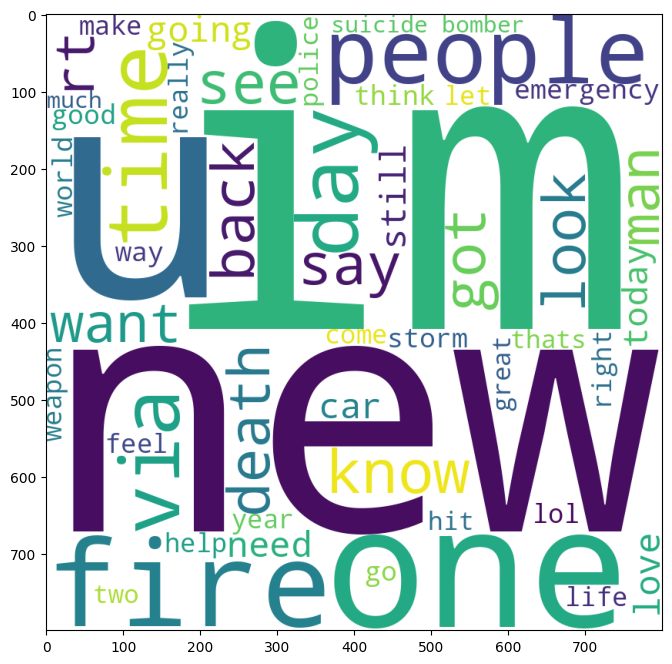

In [51]:
from wordcloud import WordCloud
reviews_combined = " ".join(train_df.text.values)
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=50).\
generate_from_text(reviews_combined)
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

<Axes: xlabel='words'>

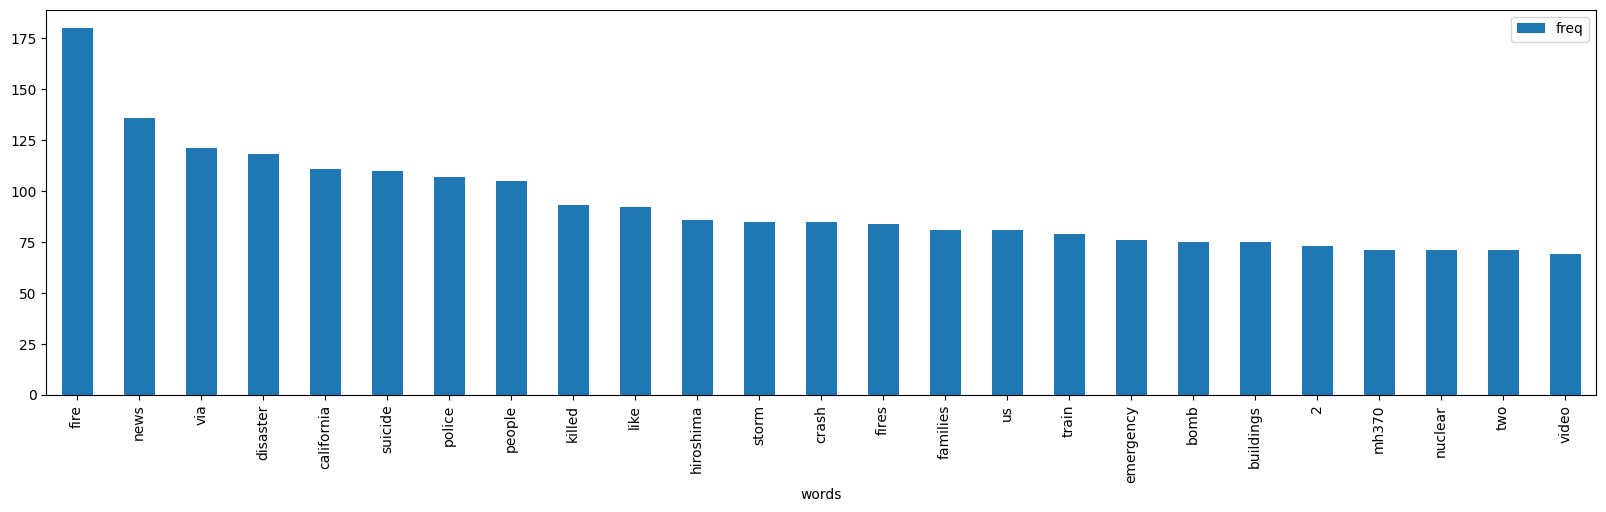

In [52]:
reviews_combined = ' '.join(train_df[train_df['target']==1]['text'])

all_terms = []
fdist = {}
all_terms = reviews_combined.lower().split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1
    
    
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

<Axes: xlabel='words'>

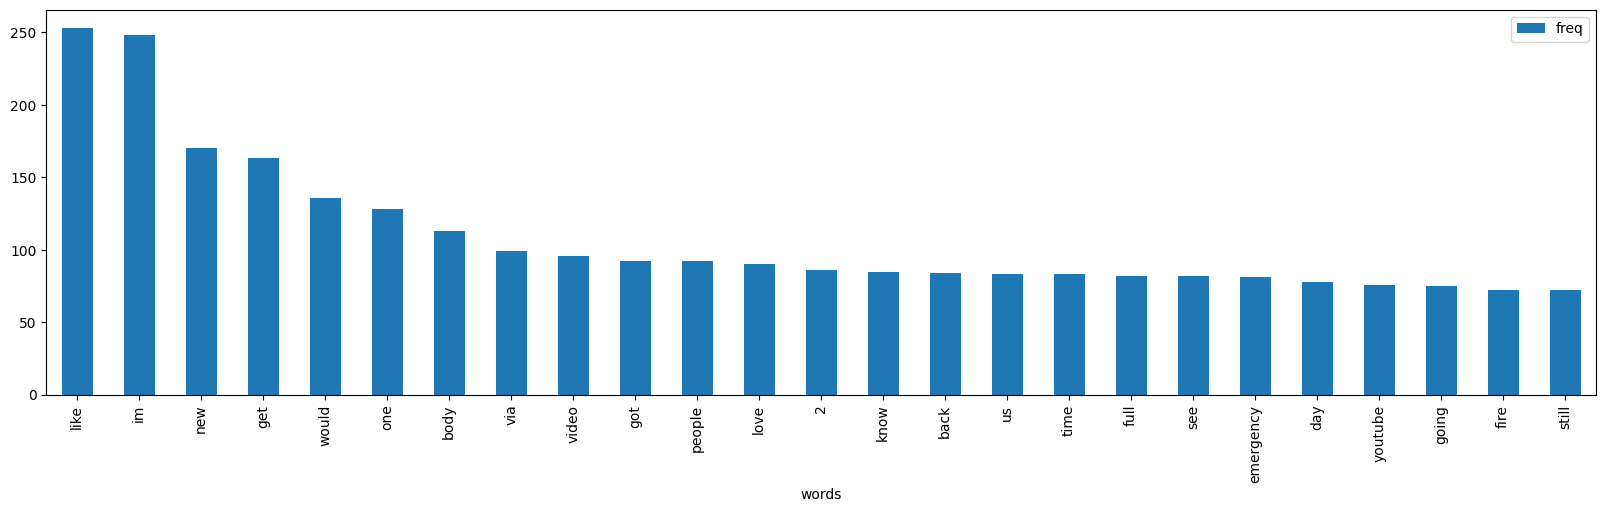

In [53]:
reviews_combined2 = ' '.join(train_df[train_df['target']==0]['text'])

all_terms2 = []
fdist2 = {}
all_terms2 = reviews_combined2.lower().split(" ")
for word in all_terms2:
    fdist2[word] = fdist2.get(word,0) + 1
    

freq2 = {"words":list(fdist2.keys()),"freq":list(fdist2.values())}
df_dist2 = pd.DataFrame(freq2)


df_dist2.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

In [54]:
# Get the top 25 words from df_dist and df_dist2
top_words_df_dist = set(df_dist.sort_values(ascending=False, by="freq").head(25)["words"])
top_words_df_dist2 = set(df_dist2.sort_values(ascending=False, by="freq").head(25)["words"])

# Find the common words
common_words = top_words_df_dist.intersection(top_words_df_dist2)

# Number of common words
num_common_words = len(common_words)

print("Number of common words in top 25: ", num_common_words)
print("Common words in top 25: ", common_words)

Number of common words in top 25:  8
Common words in top 25:  {'emergency', 'us', 'video', 'people', '2', 'fire', 'via', 'like'}


In [55]:
def remove_comman_words(text):
    words_to_remove = ['time', 'new','via', 'like' , '2', 'us' , 'people']
    letters_to_remove = r'\b[a-z]\b'
    
    for word in words_to_remove:
        text = text.replace(word, '')

    text = re.sub(letters_to_remove, '', text, flags=re.IGNORECASE)

    return text

train_df['text'] = train_df['text'].apply(remove_comman_words)
test_df['text'] = test_df['text'].apply(remove_comman_words)
train_df["text"]=train_df["text"].apply(lambda x : remove_multiple_spaces(x))
test_df["text"]=test_df["text"].apply(lambda x : remove_multiple_spaces(x))

# 🤖 Building Models and Making Predictions

In [56]:
X_train = train_df['text']
Y_train = train_df['target']

vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_vec, Y_train)

X_test = test_df['text']
X_test_ids = test_df["id"]

# Vectorize the test data using the corresponding vectorizer
X_test_vec = vectorizer.transform(X_test)

predictions = model.predict(X_test_vec)
predictions_data = []
predictions_data.extend(zip(X_test_ids, predictions))

# 📤 Final Deliverable

In [57]:
# Create a DataFrame from predictions_data
predictions_df = pd.DataFrame(predictions_data, columns=['id', 'target'])

# Save predictions to a CSV file
predictions_df.to_csv('submission.csv', index=False)

print("Predictions saved to predictions.csv")

predictions_df

Predictions saved to predictions.csv


,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


# 📊🏆 Performance Evaluation - Score : 0.79190